# NASA Space Apps Challenge
## Team Operation: Proetheus
<table>
    <tr>
        <td><img src="http://www.kepfeltoltes.eu/images/2020/10/04/711output_onlinepngtools.png"></img> </td>
        <td><img src="https://miro.medium.com/max/350/1*Yf66eLjU4H3g7pIvpXlM5w.jpeg"></img> </td>
    </tr>
</table>

In [ ]:
# Install necessary libraries
!pip install pandas
!pip install pymongo
!pip install sklearn

In [38]:
import pandas as pd
import pymongo
import matplotlib.pyplot as plt


In [3]:
# Pymongo Connection
client = pymongo.MongoClient(host="34.123.34.16", username="root", password="*******")
# TODO RENAME DB
db = client.hackathon

# TODO GET DATA
data = pd.DataFrame(list(db.relevant_points2.find()))

# Conat weather data
data = pd.concat(
    [
        data,
        pd.DataFrame.from_records(data.weather.apply(lambda row: row[0])),
    ], 
    axis=1
)

In [5]:
# Data shape
data.shape

(174570, 22)

<AxesSubplot:>

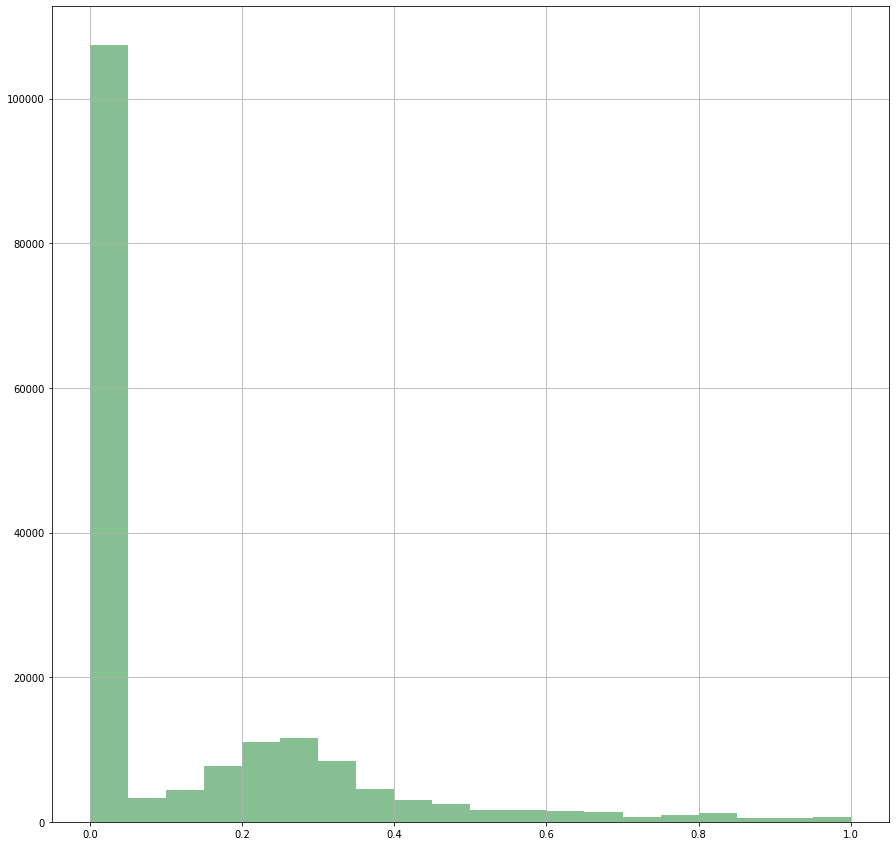

In [14]:
# Check target value (confidence) distribution
data.confidence.hist(figsize=(15,15), bins=20, color="#86bf91")

<AxesSubplot:>

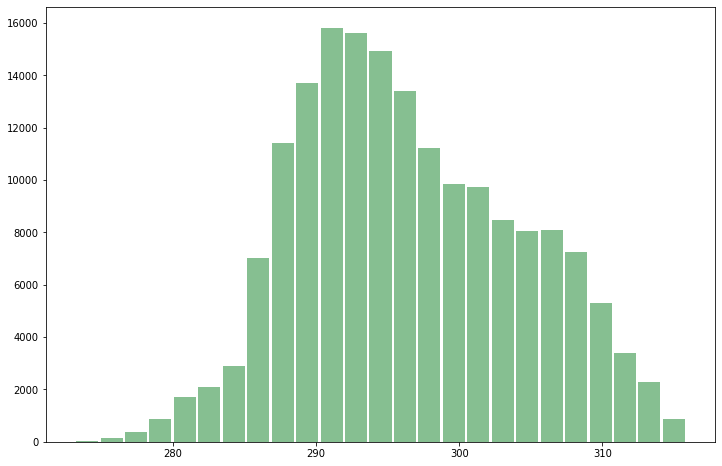

In [8]:
data.temp.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<AxesSubplot:title={'center':'dt'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'feels_like'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'dew_point'}>],
       [<AxesSubplot:title={'center':'clouds'}>,
        <AxesSubplot:title={'center':'visibility'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'wind_deg'}>,
        <AxesSubplot:title={'center':'confidence'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

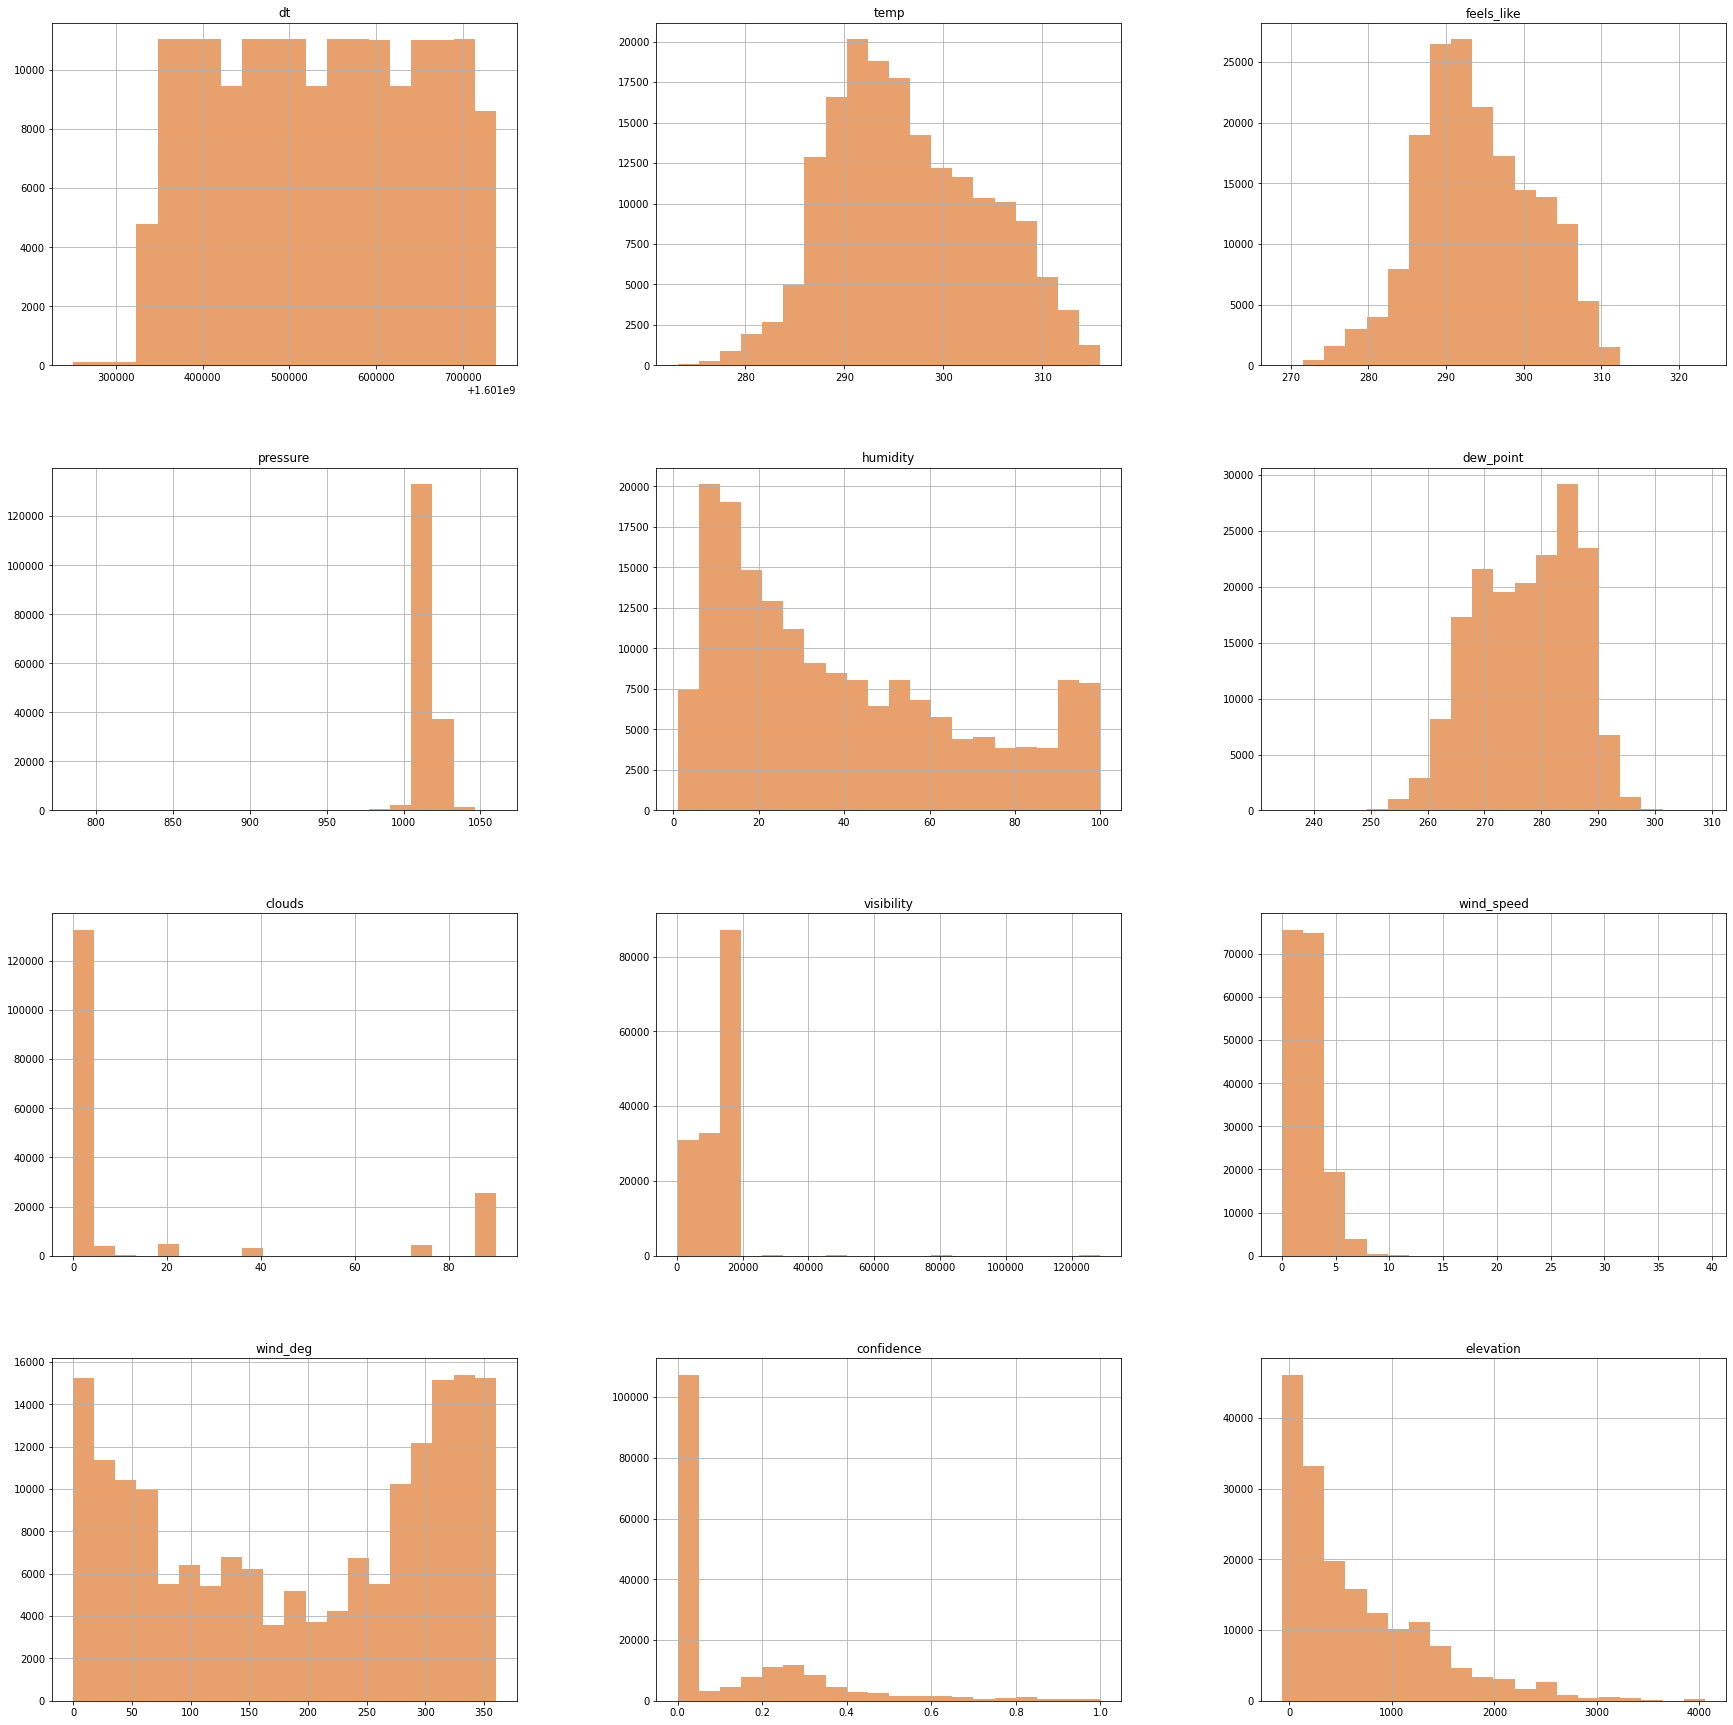

In [34]:
data.drop(columns=["_id", "id"]).hist(figsize=(30,80), bins=(20), color='#e8a06d', layout=(10,3))

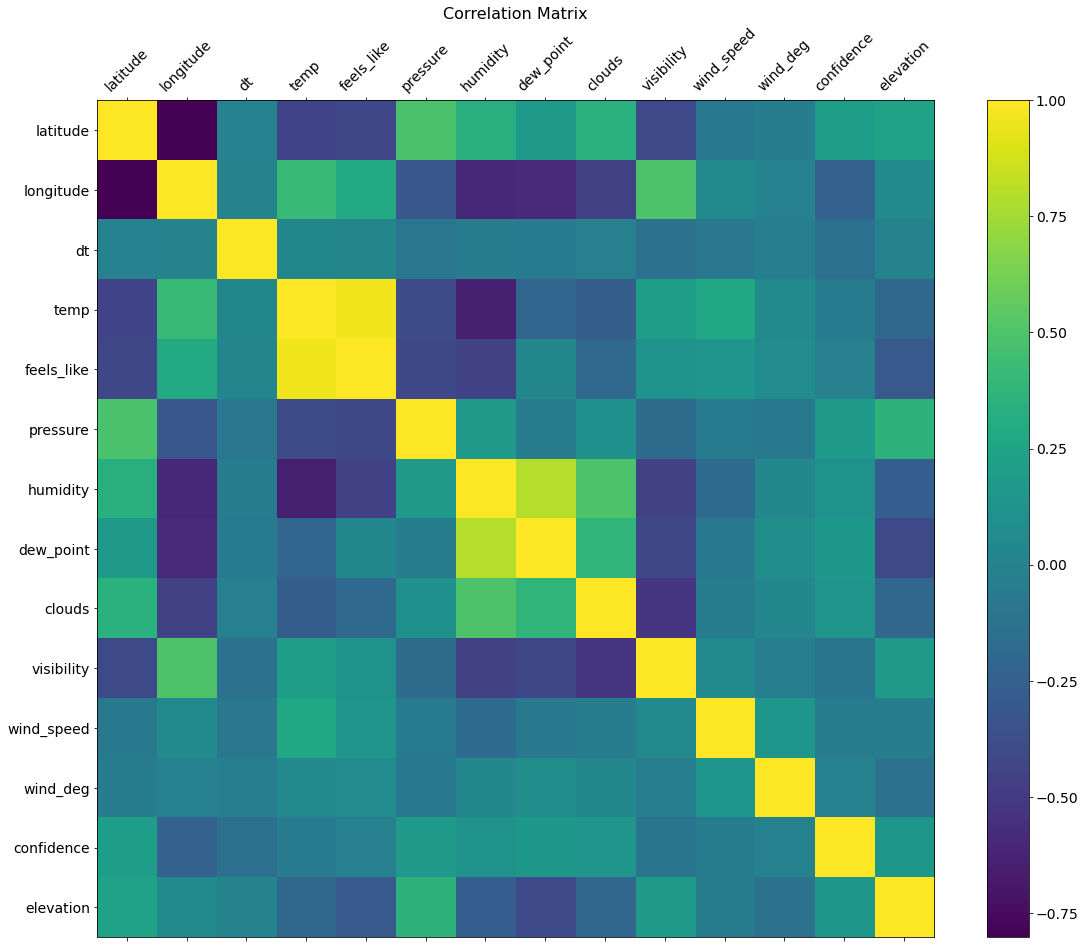

In [54]:
# Plot correlation table for features

selected = data.drop(columns=["date", "_id", "weather", 'id', "main", "description", "icon", "external_id"])
selected.latitude = selected.latitude.astype(float)
selected.longitude = selected.longitude.astype(float)
f = plt.figure(figsize=(19, 15))
plt.matshow(selected.corr(), fignum=f.number)
plt.xticks(range(selected.shape[1]), selected.columns, fontsize=14, rotation=45)
plt.yticks(range(selected.shape[1]), selected.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [56]:
separated = pd.concat(
    [
        data,
        pd.get_dummies(data.main),
    ], 
    axis=1
)

# Drop columns
separated.drop(
    columns=[
        "_id", "id", "date","weather", "description", "icon", "main", "external_id"], 
    inplace=True
)